# **Project Name**    -Play Store App Review Analysis



##### **Name**    - Jashwin HR
##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

* Android is most popular Operating System with 2.5 Billion active user. Android is the dominant mobile operating system today with about 85% of all mobile devices running Google’s OS. The Google Play Store is the largest and most popular Android app store.

* Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.

* Goals of Project - The purpose of our project was to gather and analyze detailed information on apps in the Google Play Store in order to provide insights on app features and the current state of the Android app market.

* The Objective of our project to Explore and analyse the Data to discover key factor responsible for app engagement and recommend best fit and features that would lead to app success

* We have tried to discover the relationships among various attributes such as which application is free or paid, what are the user reviews, rating of the application.

* The data shared has each value(Row) has values for Category, Review, Rating, Size etc. with 10841 Rows and 13 Columns.

# **Problem Statement**





* Android is expanding as an operating system. It has captured around 74% of the total market which is a true indicator of the huge amount of population using android. Our goal is to help android developers to know what is the motivating factor for people to download an app. It will also help to find out the factors that affect someone’s decision to download an app. I would like to analyse category, reviews, price, ratings and installs for this purpose and find out how they are inter related.

There have some Problem Statements that are very useful for finding the insight from given Dataset -

* Which category has most number of installations.
* Top 5 app with the maximum installation.
* Top 5 poor app in refrence of instaallation.
* How Rating is important for Application.
* Top Category on Play Store.
* Find number of app in refrence of Free or Paid.



#### **Define Your Business Objective?**

* The objective of my analysis is to provide insights about android applications and their categories.
* To deep dive in data for the factors of influences on an application, to know why and how certain applications succeed and others.
* Finds the key Factor that are responsible for app engagement.
* Study the detailed information of app and analyse them.
* Finds which attributes are most important for application.
* Also, what is required for an application to be considered as successfully topping the charts.


:# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import missingno as msno   #library to identify the missing values/numbers

#setting font size throughout the notebook
plt.rcParams.update({'font.size': 14})

%matplotlib inline
#to keep the graph visible even after the disconnect

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading data file
filepath = ('/content/drive/MyDrive/project/Almabetter Project/Play Store Data.csv')
df = pd.read_csv(filepath)

In [ ]:
# reading user review csv
filepath2 = ('/content/drive/MyDrive/project/Almabetter Project/User Reviews.csv')
df2 = pd.read_csv(filepath2)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Dataset Rows & Columns count

---



In [ ]:
# Dataset Rows & Columns count
df.shape

(10841, 13)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(dup)

483


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isna().sum()
print(missing_values)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


<Axes: >

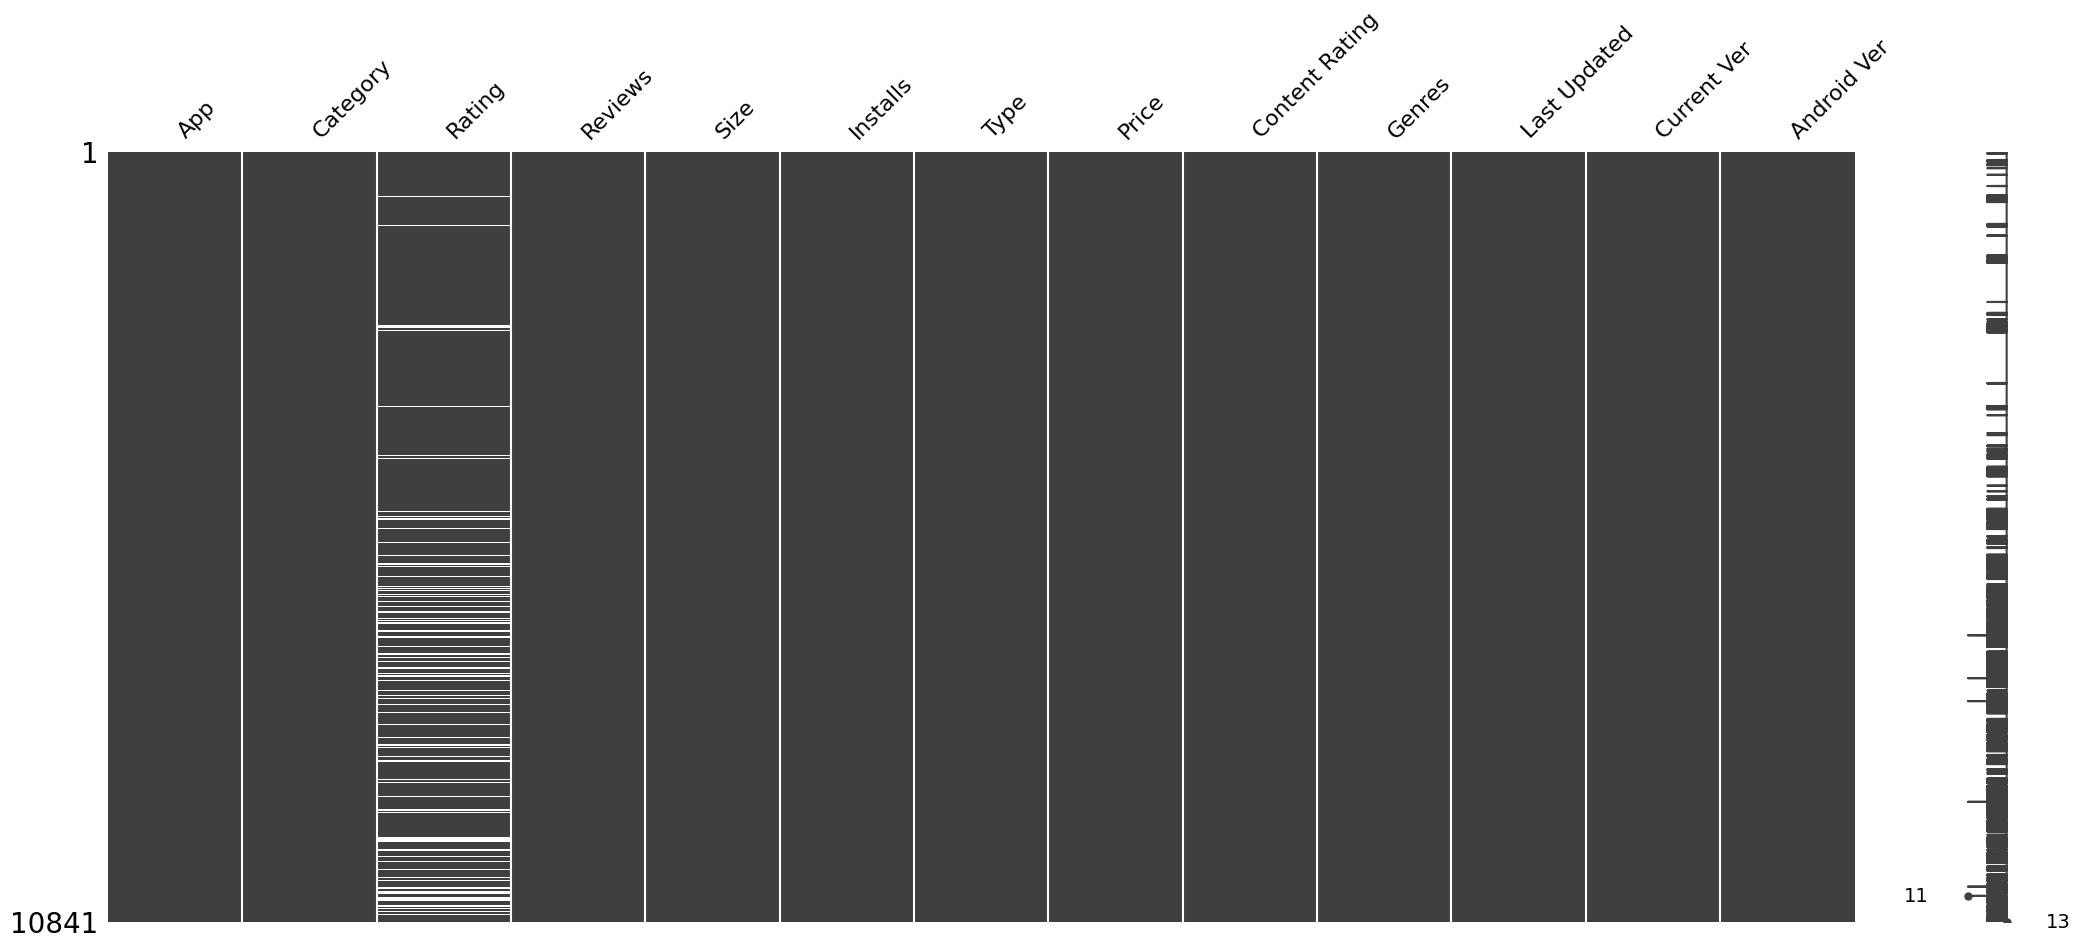

In [ ]:
# Visualizing the missing values
msno.matrix(df)

### What did you know about your dataset?

we see that **except ratings other values are of object type,** so we need to evalvulate the fields with respect to there values such as int or other respective column type.

**the following are the counts for null values.**

*    Rating:            1474
*   Type:                 1
*   Content Rating:       1
*   Current Ver:          8
*   Android Ver:  3

**The following columns are listed in the dataframe**

1.   App : indicates the name of the apps (this column has duplicate values in the rows)
2.   Category : this indicates the various categories of the apps
3.   Rating: this indicates the ratings recieved by the respective apps
4. Reviews: this indicates the number or reviews recieved by the app
5. Size :indicates the size of the app
6. Installs: indicates the number of installs of the respective app
7. Type: Shows the type of the app which is free or paid
8. Price: this field shows the price of the fields, 0 for free and amount if paid
9. Content Rating:shows the targated audiance of the app and what type of audiance has reviewed the app
10. Genres: shows the Genre of the app, (same as category)
11. Last Updated: shows the latest date of the app that has updated
12. Current Ver: shows the latest version of the app
13. Androaid Ver: shows the version of android which can support the given app

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Dataset Describe
print('data Describe')
print('-'*30)
print(df.describe())
print('-'*30)
print('data info')
print('-'*30)
print(df.info())

data Describe
------------------------------
            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000
------------------------------
data info
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver  

the following columns are listed in the dataframe

1.   App : indicates the name of the apps (this column has duplicate values in the rows)
2.   Category : this indicates the various categories of the apps
3.   Rating: this indicates the ratings recieved by the respective apps
4. Reviews: this indicates the number or reviews recieved by the app
5. Size :indicates the size of the app
6. Installs: indicates the number of installs of the respective app
7. Type: Shows the type of the app which is free or paid
8. Price: this field shows the price of the fields, 0 for free and amount if paid
9. Content Rating:shows the targated audiance of the app and what type of audiance has reviewed the app
10. Genres: shows the Genre of the app, (same as category)
11. Last Updated: shows the latest date of the app that has updated
12. Current Ver: shows the latest version of the app
13. Androaid Ver: shows the version of android which can support the given app

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
  res = len(df[column].unique())
  print(f"The number of variables in {column} column are: {res}")

The number of variables in App column are: 9660
The number of variables in Category column are: 34
The number of variables in Rating column are: 41
The number of variables in Reviews column are: 6002
The number of variables in Size column are: 462
The number of variables in Installs column are: 22
The number of variables in Type column are: 4
The number of variables in Price column are: 93
The number of variables in Content Rating column are: 7
The number of variables in Genres column are: 120
The number of variables in Last Updated column are: 1378
The number of variables in Current Ver column are: 2833
The number of variables in Android Ver column are: 34


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#creating one funtion that can evaluate Price, Installs, Size and Reviews
def convert_int(x):
  ''' this function takes the object and removes ',' + , M, k, $ returns it
  after evalvating by the function eval
  '''
  # print('Evalvating...')
  # try:

  if x.isdigit():         # Checking if the object is alread integer to and converting it before itterating if loops for making the function more optimised
      return eval(x)
  else:
      if ',' in x:          #writing series of if condition to reduce the operations complexity on the objects
        x=x.replace(',','')
      if '+' in x:          #this occurs in installs colum, so we are removing the same to have a proper int format
        x=x.replace('+','')
      if 'M' in x:
        x=x.replace('M','')        # since this value occurs in Size we are converting Millions to int format by adding 6 zeros to the same
        x= eval(x)
        x = x * 10**6
        return x
        # x=x.replace('M','')
      if 'k' in x:          # since this value occurs in Size we are converting Kilo to int format by adding 3 zeros to the same
        x=x.replace('k','')
        x = eval(x)
        x= x * 10**3
        return x
        # x=x.replace('k','')
      if '$' in x:
        x=x.replace('$','') #this occurs in price column, so we are taking out the $ symbol
      if x=='Free' or x=='Varies with device'or x=='Everyone':    #there are some columns entered with missplaced values, setting them to zero.
        x=0
      else:
        x= eval(x)
        # return x
      # x=eval(x)
      return x
  # except:
  #     print('error in applying function')


      # return x

In [ ]:
df['Reviews'] = df['Reviews'].apply(convert_int)
df['Size'] = df['Size'].apply(convert_int)
df['installs'] = df['Installs'].apply(convert_int)
df['Price'] = df['Price'].apply(convert_int)

### What all manipulations have you done and insights you found?

In [ ]:
# we see that there is one rating value that is 19 which could be human error, this may affect the median value in further steps, so we set it as 1.9.
df.loc[df['Rating'] == 19, 'Rating'] = 1.9

In [ ]:
x = df.Rating.unique()
x.sort()
print(x)

[1.   1.2  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5
 2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9
 4.   4.1  4.19 4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.  ]


In [ ]:
# We see that some values in category has underscores in it, so we are replacing the underscore with space
def remove_underscores(x):
  if '_' in x:
    x = x.replace('_', ' ')
  return x

In [ ]:
# applying 'remove_underscores' function on category column

df['Category'] = df['Category'].apply(remove_underscores)

we see that the following are null values.

*    Rating:            1474
*   Type:                 1
*   Content Rating:       1
*   Current Ver:          8
*   Android Ver:  3



since there are many values in ratings that can be replaced with median values

<Axes: title={'center': 'Distribution plot of Rating Feature'}, xlabel='Rating', ylabel='Density'>

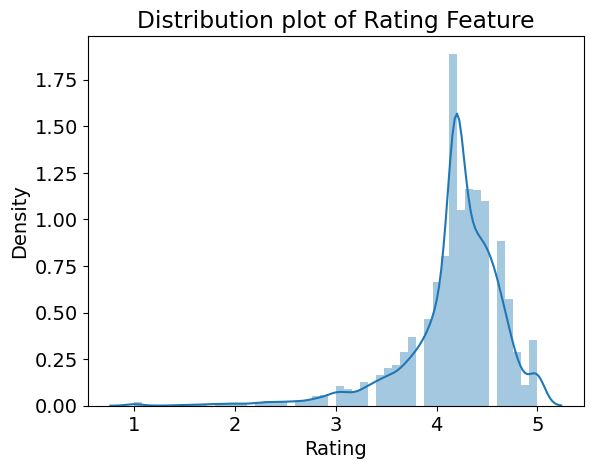

In [ ]:
#By ploting distribution plot we can choose between mean amd median.
plt.title('Distribution plot of Rating Feature')

sns.distplot(df['Rating'],kde = True)

In [ ]:
# In this case we use mean to have A Normal Distribution
median_value_for_ratings = df['Rating'].mean()
median_value_for_ratings = round(median_value_for_ratings, 2)
df['Rating'] = df['Rating'].fillna(median_value_for_ratings)
print(f'the values for null us updated as {median_value_for_ratings}')

the values for null us updated as 4.18


In [ ]:
# since the other values are minum null values, we drop them
df = df.dropna(subset = ['Type', 'Content Rating', 'Current Ver', 'Android Ver'])

In [ ]:
# Dataset Duplicate Value Count
dup = df['App'].duplicated().sum()
print(dup)

0


we see that there are 1181 duplicated rows in app names colums, so we are keeping the first and dropping the remaing

In [ ]:
#we see that there are duplicate names off apps in apps column, so dropping duplicates and keeping first
df = df.drop_duplicates(subset=['App'],keep="first")

## Summary of data Manipulation

* Rating had 1474 null values which contributes 13.60% of the data so the null values are replaced by mean ie 4.19
* the following null values are dropped
>* Type had 1 null value which contributes 0.01% of the data.
>* Content Rating had 1 null value which contributes 0.01% of the data.
>* Current Ver had 8 null values which contributes 0.07% of the data.
>* Android Ver had 3 null values which contributes 0.03% of the data.

The following actions are taken
1. Removed Outliers from Rating column.
2. Removed underscore from Required columns.
3. Converted the Data types from object to int or float.
4. Handling the missing value.
5. Solving the Structural Error.


### after data cleaning and manipulation, we are now again analysing the data for understanig if all the discrepancies are gone

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   float64
 4   Size            9648 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9648.000000,9.648000e+03,9.648000e+03,9.648000e+03,9648.000000
mean,4.175842,2.168369e+05,1.781989e+07,7.786211e+06,1.100193
std,0.494511,1.832349e+06,2.150200e+07,5.378830e+07,16.861727
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,2.900000e+06,1.000000e+03,0.000000
50%,4.200000,9.690000e+02,9.200000e+06,1.000000e+05,0.000000
75%,4.500000,2.944925e+04,2.500000e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510.0,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART AND DESIGN,4.5,215644.0,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.3,967.0,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
Comparision of users using paid app and free app

Text(0.5, 1.0, 'Type Distribution')

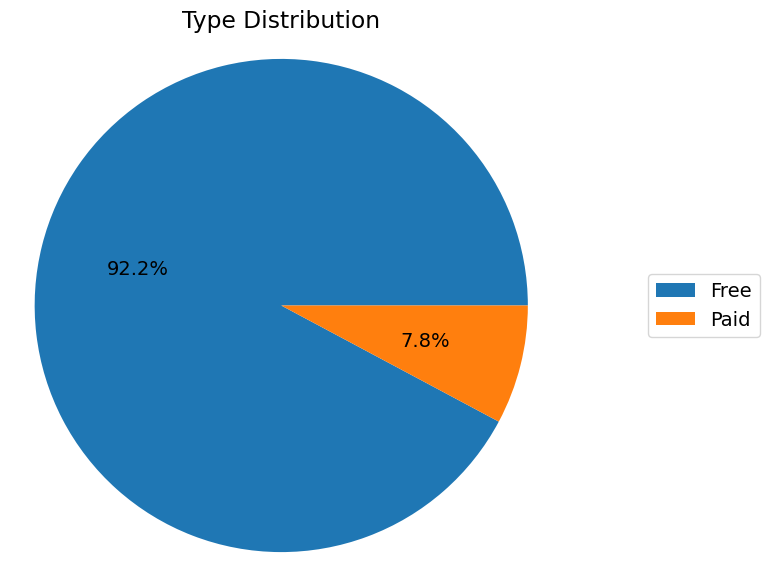

In [ ]:
# Chart - 1 visualization code
# application type distribution
#Here we use pie plot
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))
number_of_apps = df['Type'].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values

# plotting the same
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.title('Type Distribution')
# plt.show()

##### 1. Why did you pick the specific chart?

A pieplot shares the distribution of apps by their type(free or paid) very clearly.

##### 2. What is/are the insight(s) found from the chart?

We see that the total number of apps which are paid are 7.8% and rest are free.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is observed that the majority of apps that are publised are free to use and very less number of apps are paid

#### Chart - 2
lowest raiting for the apps with respect to categories

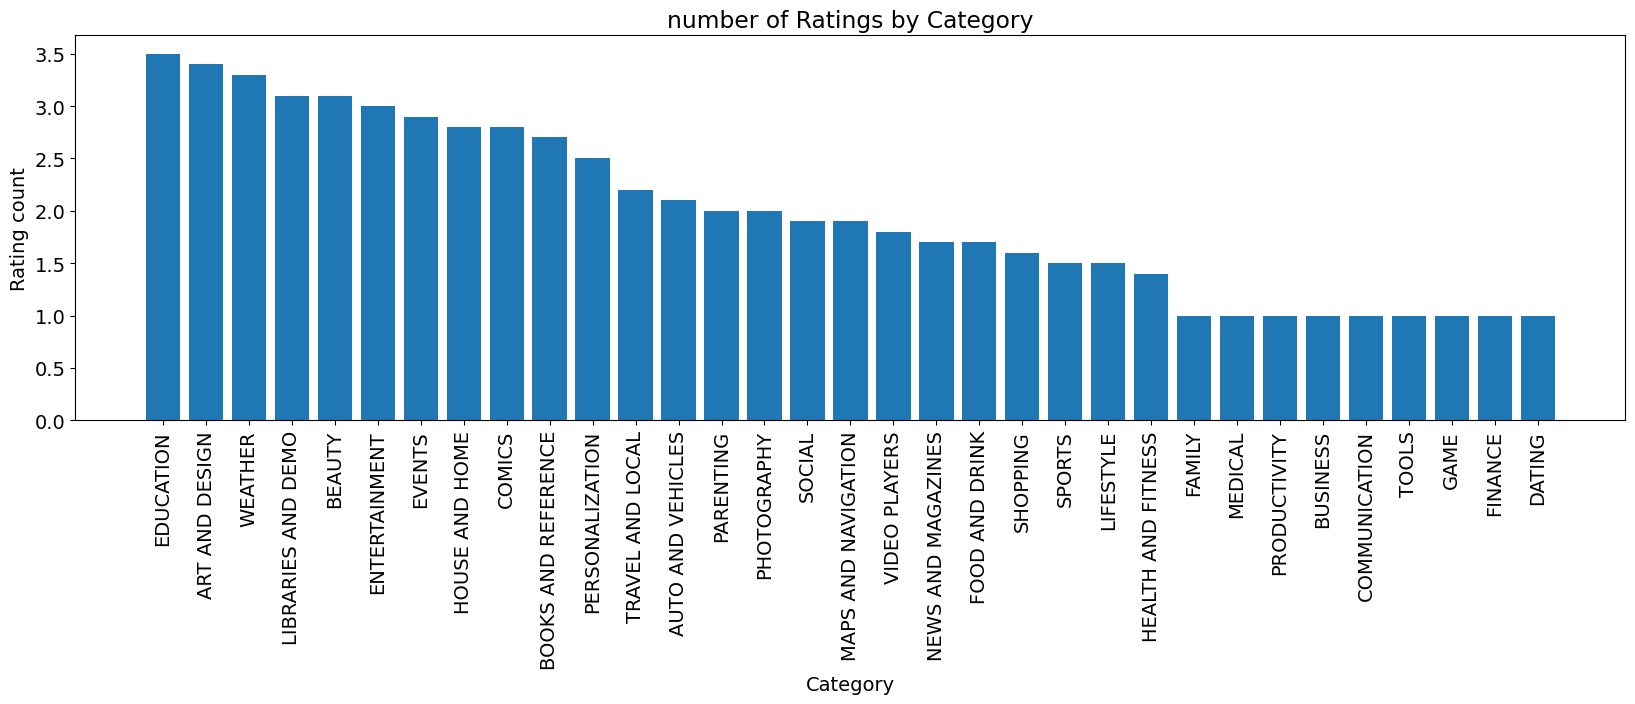

In [ ]:
# Chart - 2 visualization code
# heights ratings with respect to category
category_avg_ratings = df.groupby('Category')['Rating'].min().sort_values(ascending = False)

# plotting
plt.rcParams['figure.figsize'] = (20, 5)
plt.bar(category_avg_ratings.index, category_avg_ratings.values)
plt.title('number of Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating count')
plt.xticks(rotation=90)

plt.show()

##### 1. Why did you pick the specific chart?

we are ploting minimum values against each category, so Bar chart would be best suited for the visualization to understand whch category has lowest raitings and which has heighest

##### 2. What is/are the insight(s) found from the chart?

We see that there are apps in the category that has lowest raiting and through this we can identify the category in which we can work on by exceptionally making a better app.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As a result we can see that there are many apps with lowest raiting and we have hope or chance to bring a better app to the market.

#### Chart - 3
Free Vs Paid apps with respect to categories

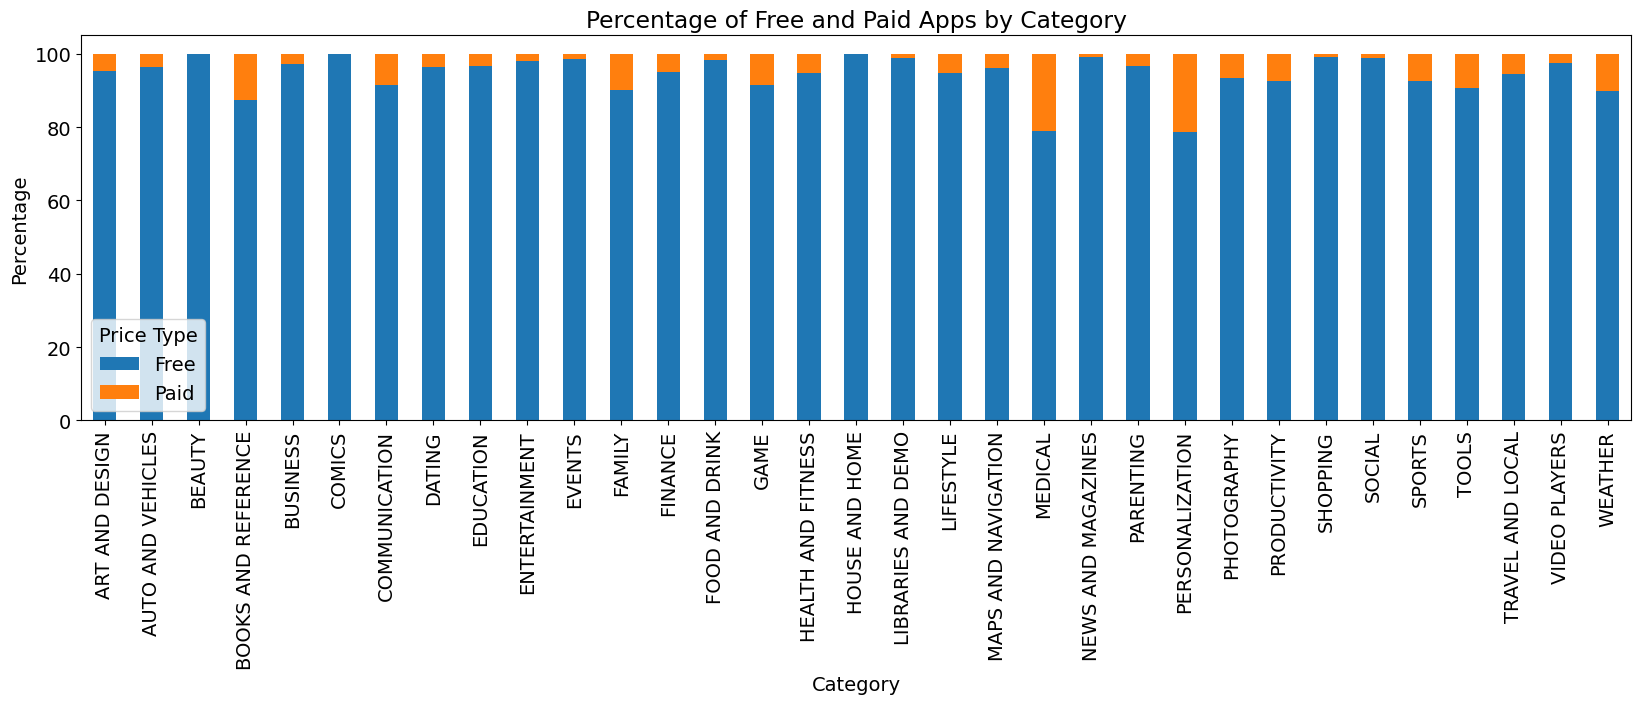

In [ ]:
# Chart - 3 visualization code
category_price_counts = df.groupby(['Category', 'Type']).size().unstack()

#plotting
total_counts = category_price_counts.sum(axis=1)
category_price_ratios = category_price_counts.div(total_counts, axis=0) * 100

# create a stacked bar chart
category_price_ratios.plot(kind='bar', stacked=True)
plt.title('Percentage of Free and Paid Apps by Category')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.legend(title='Price Type')
plt.show()


##### 1. Why did you pick the specific chart?

A stacked bar plot shows the percentage for all app categories by type(free and paid)

##### 2. What is/are the insight(s) found from the chart?

We se that the percentage of paid apps in personelization and Medical are more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can infer the ratio in percent wise distrubution at category level in the above plot, we see that the percent of Personalization and Medical app have more number of paid apps compare to other categories

#### Chart - 4
Number of Apps Per Category count plot and Pie plot

Text(0.5, 1.0, '% of apps share in each Category')

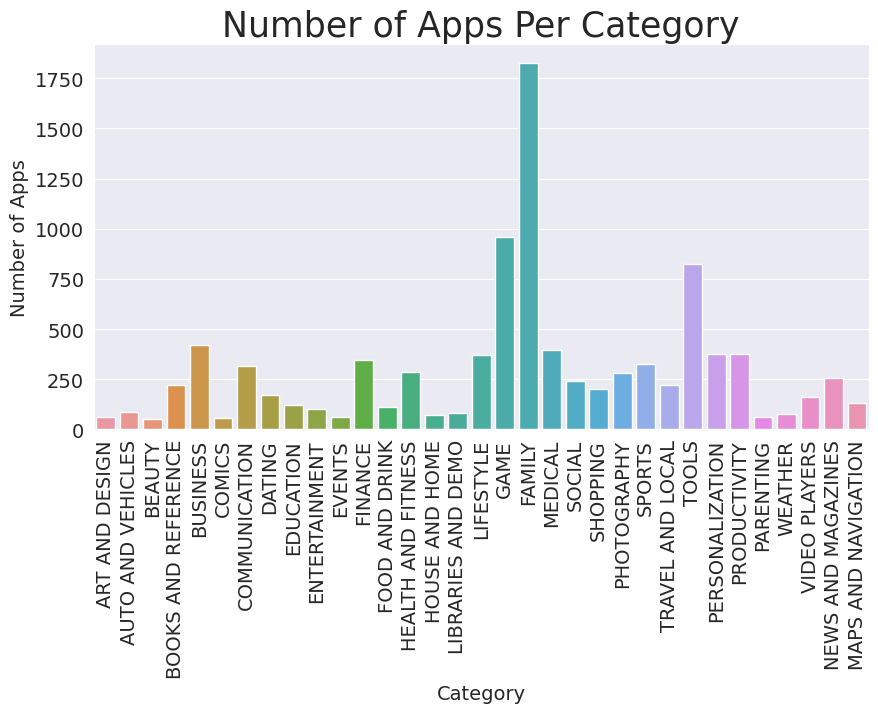

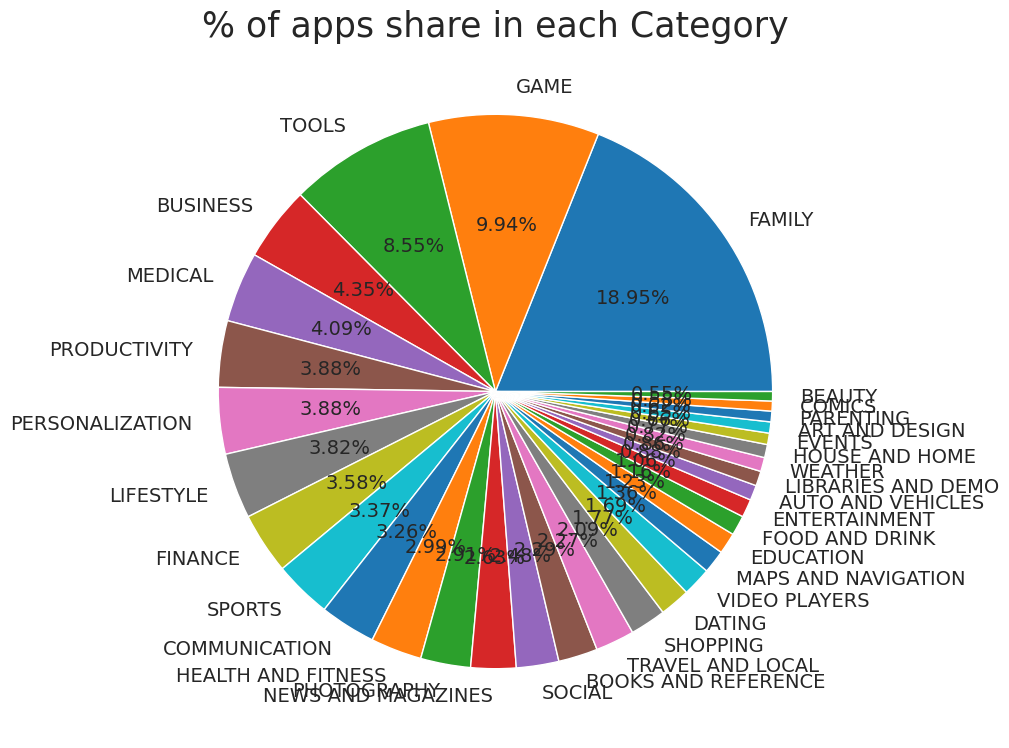

In [ ]:
# Chart - 4 visualization code
# Get the number of apps for each category using Count Plot

sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))

sns.countplot(x='Category', data=df)

plt.title('Number of Apps Per Category', fontsize = 25)
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')

# Percentage of apps belonging to each category in the playstore using Pie plot
plt.figure(figsize=(9,9))

plt.pie(df.Category.value_counts(), labels=df.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')

plt.title('% of apps share in each Category', fontsize = 25)

##### 1. Why did you pick the specific chart?

We have plotted 2 types of chart to get the understanding for better, seaborn count plot and Pie explain better way to demonstrate the share of the number of apps accross various categories

##### 2. What is/are the insight(s) found from the chart?

We find that the number of apps in Family category is 18.5% followed by Games with 9.94% and tools app with 8.55%


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We see that there are many apps in family, games and tools category, this plot can help us to understand the market size of the category in which we are trying to make our new app

#### Chart - 5
Total app installs in each category

Text(0.5, 1.0, 'Total app installs in each category')

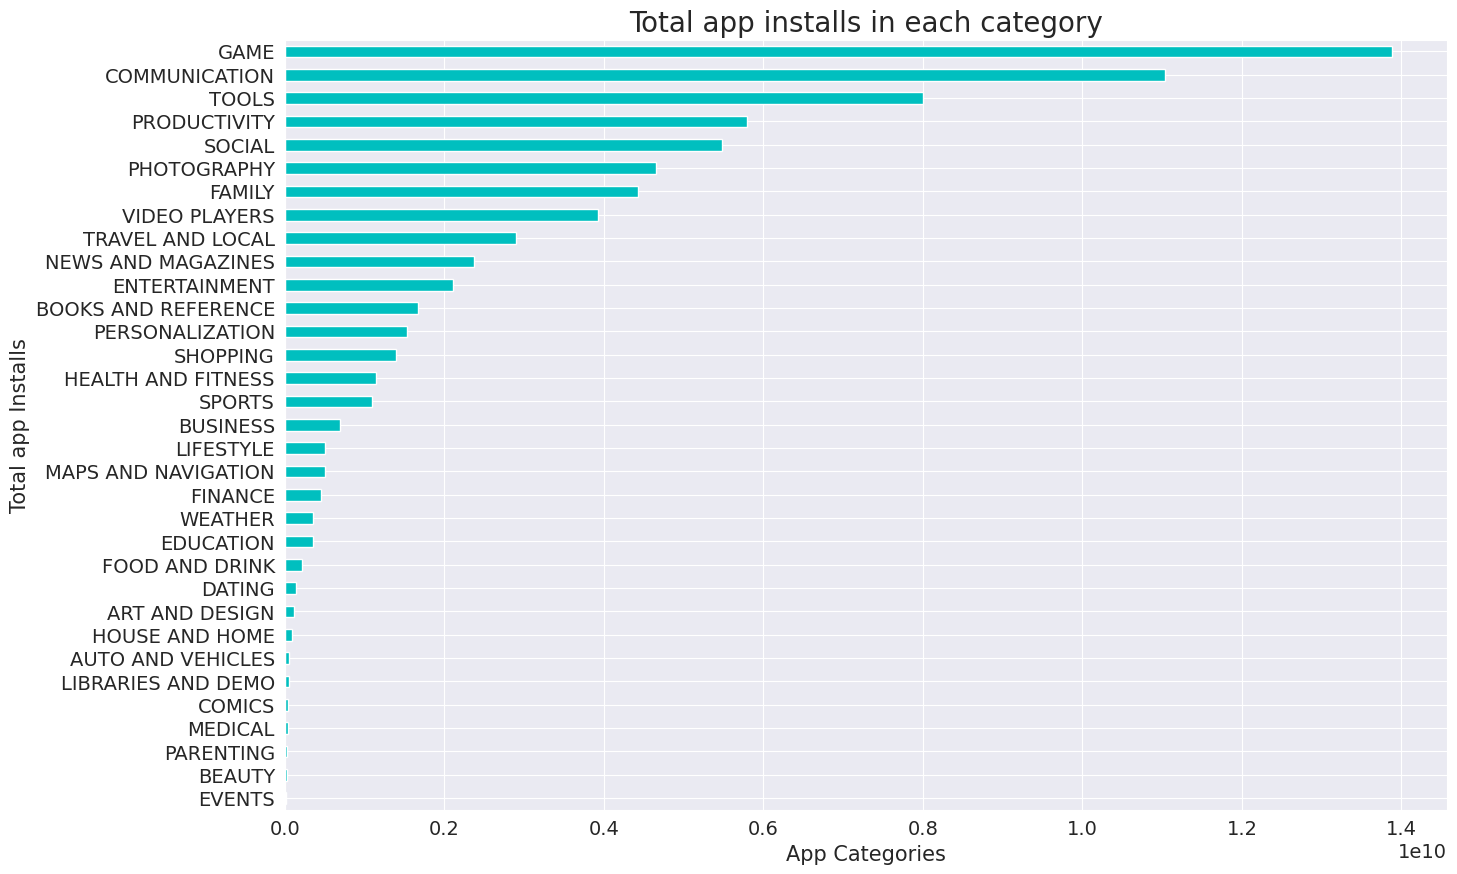

In [ ]:
# Chart - 5 visualization code
Max_Installs = df.groupby(['Category'])['Installs'].sum().sort_values()

#plotting
Max_Installs.plot.barh(figsize=(15,10), color = 'c', )
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

##### 1. Why did you pick the specific chart?

A horizontal bar plot gives us a clear pitcure of the number of installs with respect to category.

##### 2. What is/are the insight(s) found from the chart?

We see that the maximum installs are for the gaming category and we followed by communication and tools.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is observed that people tend to be more inclined toward the Gaming app and communication

#### Chart - 6
Content rating of the apps for various group of people

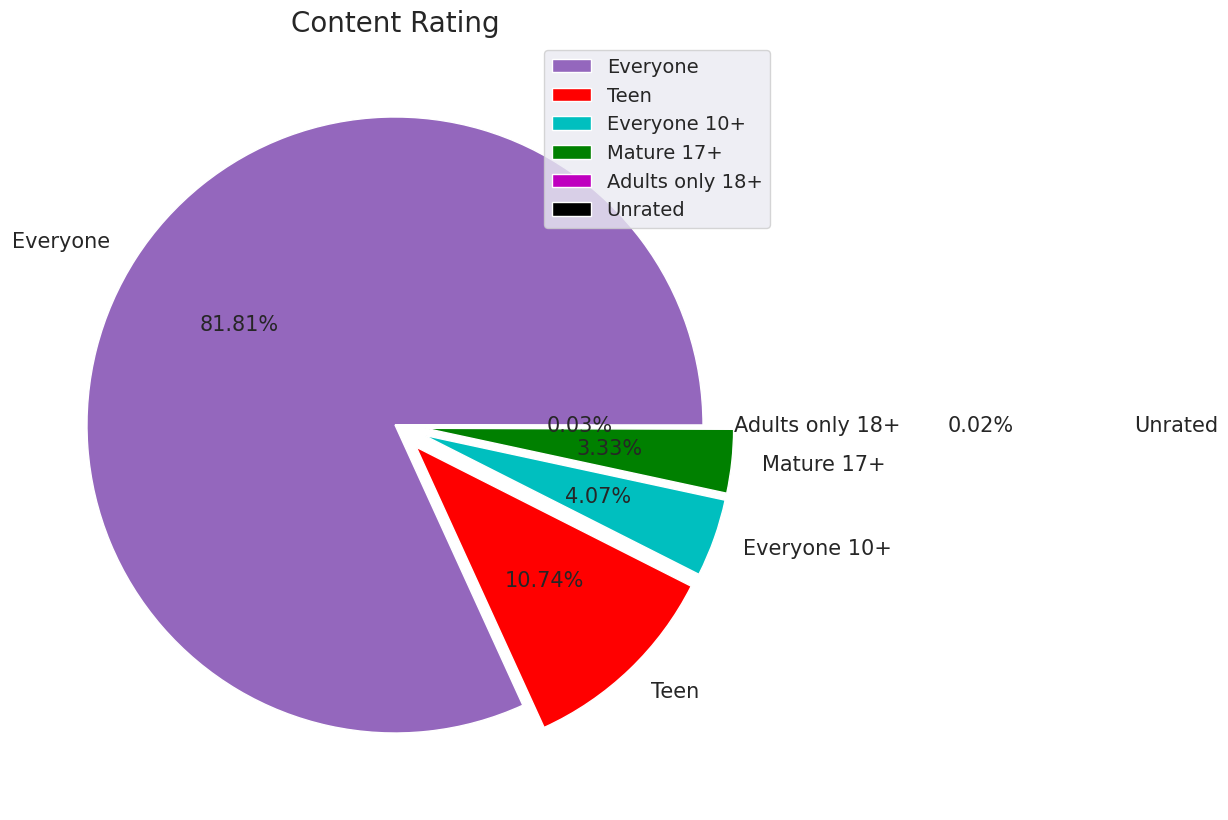

In [ ]:
# Chart - 6 visualization code
 # Content rating of the apps for diff age group of people
data = df['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

#create pie chart
plt.figure(figsize=(10,10))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['C4', 'r', 'c', 'g', 'm', 'k']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Content Rating',size=20,loc='center')
plt.legend()

##### 1. Why did you pick the specific chart?



Pie plots are usually best for sharing visually distribution of data



##### 2. What is/are the insight(s) found from the chart?

We found that most of the apps are open to be reviewed by Everyone.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

When we see correlation between app installs and review we see that the correlation is around 0.61, which is a good to have.
It is recommended to have reviews open to everyone to gain more installs.

#### Chart - 7
Paid app counts with respect to price (excluding free apps)

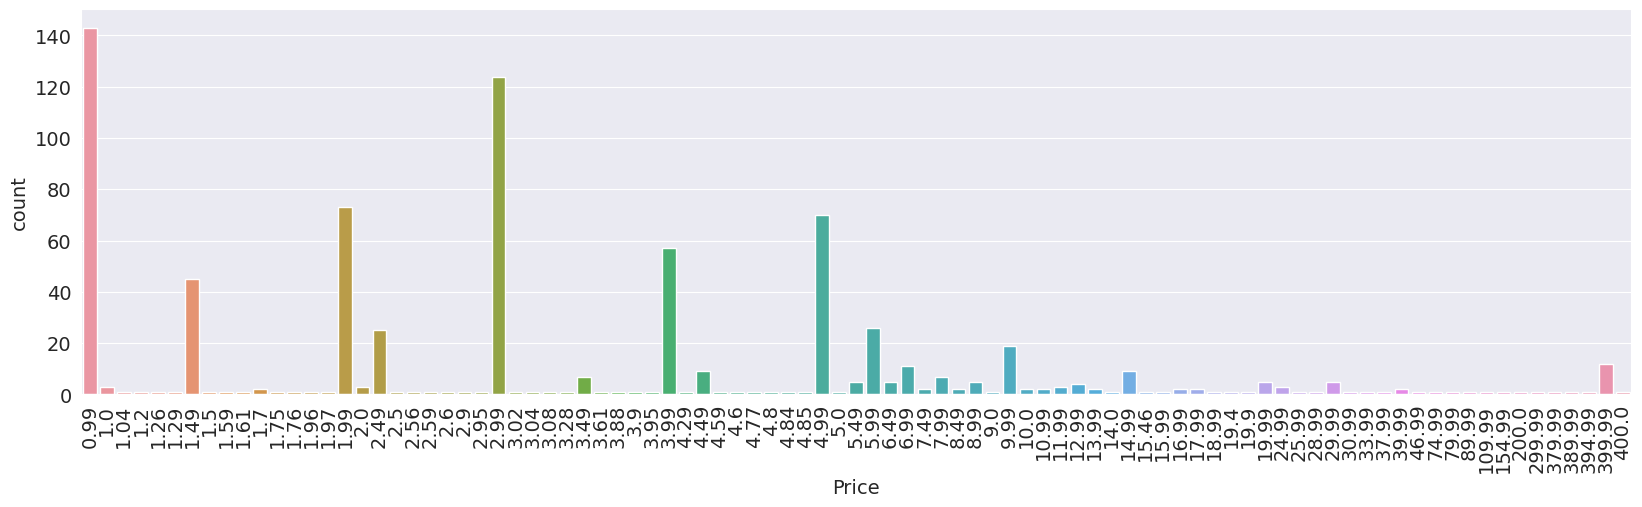

In [ ]:
# Chart - 7 visualization code
#the plot shows the paid app counts with respect to price excluding free apps

free_app_value = 0
df_without_free_apps = df['Price'] != free_app_value
sns.countplot(data=df[df_without_free_apps], x='Price')
plt.rcParams['figure.figsize'] = (20, 5)
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

A seaborn count plot shows counts of the app with respect to various values, here we wanted to know the counts of apps with price not equal to 0, so we used the above chart

##### 2. What is/are the insight(s) found from the chart?

we see that max app belong to price = 0.99 Followed by 2.99

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is observed that there many apps are released with amount = 0.99 and 2.99


It would be a good practice if we can make sure the app falls in this price range to make sure the apps are affordable.

#### Chart - 8
Ratings vs Category (Box plot)

<Axes: xlabel='Category', ylabel='Rating'>

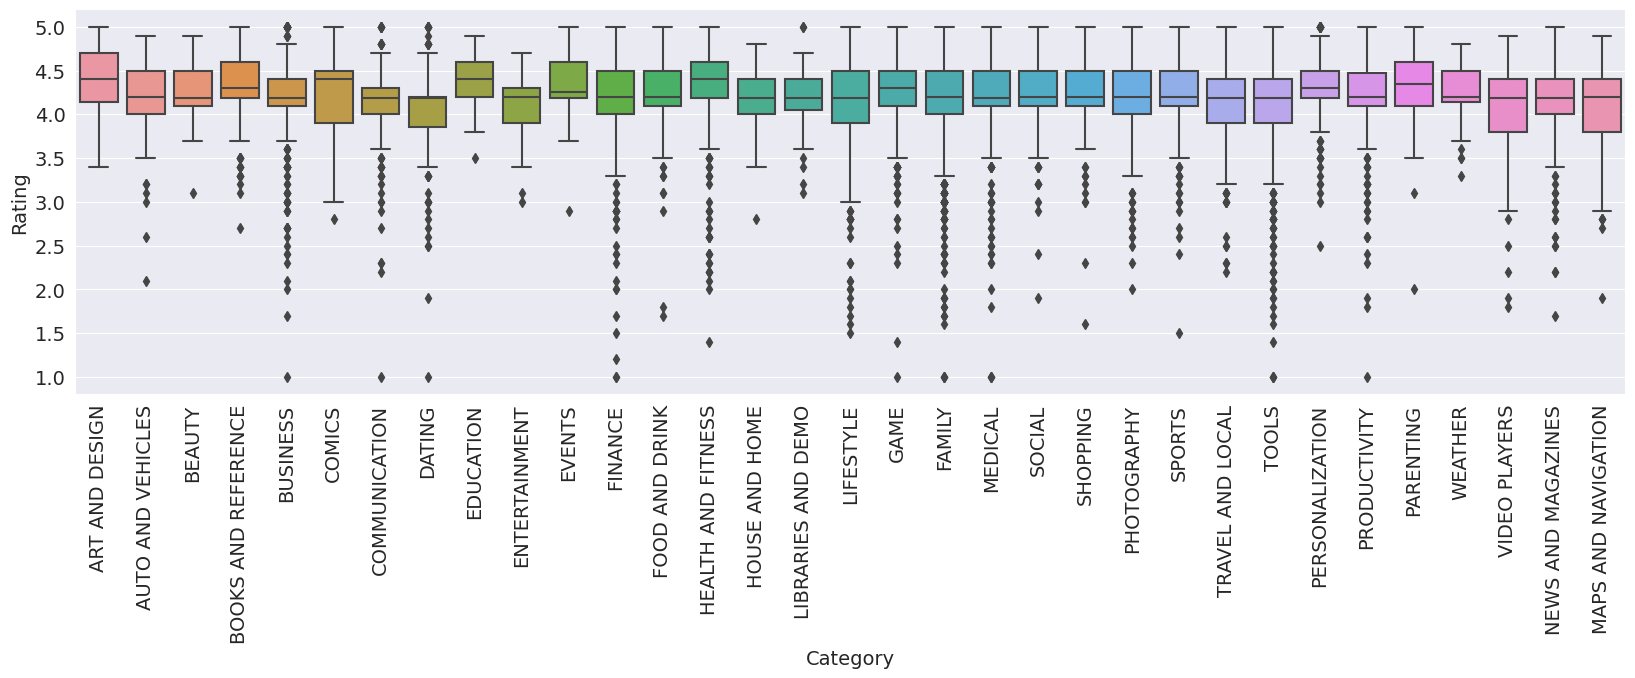

In [ ]:
# Chart - 8 visualization code
plt.xticks(rotation=90)
sns.boxplot(data=df, x="Category", y="Rating")

##### 1. Why did you pick the specific chart?

Boxplots provides a concise summary of measures such as the median, quartiles, and outliers.

This makes it easy to compare multiple datasets quickly and identify any differences or similarities.


##### 2. What is/are the insight(s) found from the chart?

Communication and events have their medians outside the box, which means the ratings recieved are not skewed

There are many outliers in various category

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The outliers below the boxes show that various apps in category are having a bad reviews so there is room for placing our app with better features in the categories with more wiskers in box plot below the boxes.

#### Chart - 9
distribution of ratings across various apps

<Axes: xlabel='Rating', ylabel='Count'>

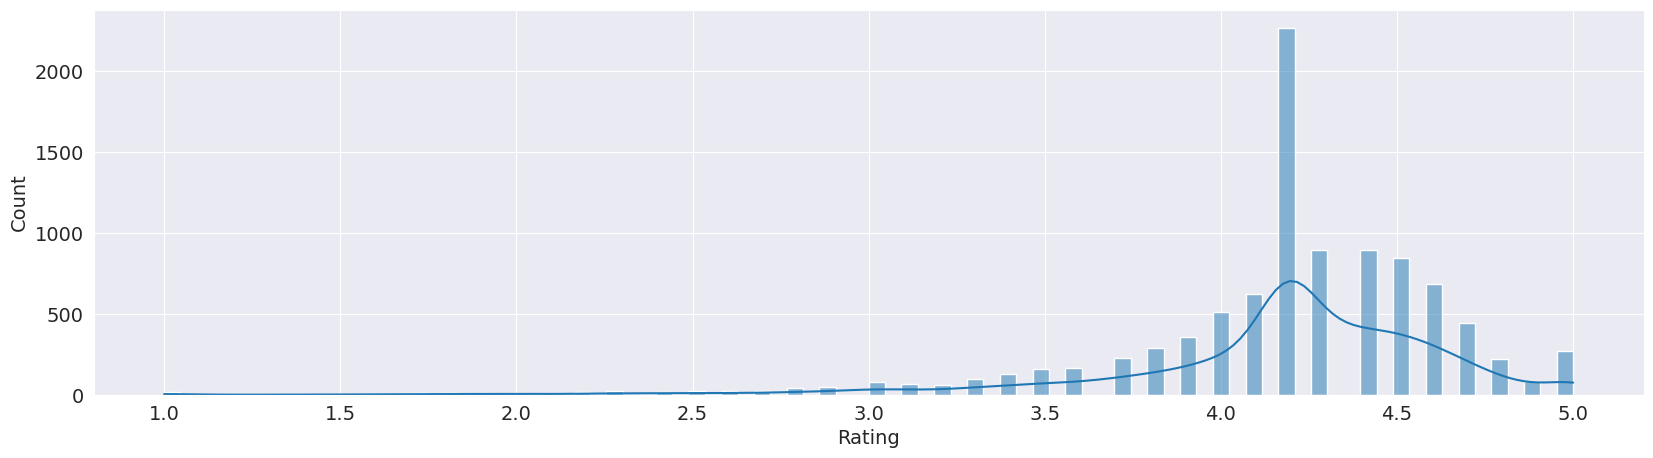

In [ ]:
# Chart - 9 visualization code
plt.rcParams['figure.figsize'] = (20, 5)
sns.histplot(df, x='Rating', kde=True)

##### 1. Why did you pick the specific chart?

Hist plots are better to analyze distribution of numric values

##### 2. What is/are the insight(s) found from the chart?

we see that most of the apps have a rating of 4.25.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

since most of the apps have 4.2 rating, there is an opportunity to have a better app that could fit the market needs.

#### Chart - 10
sentiments analysis

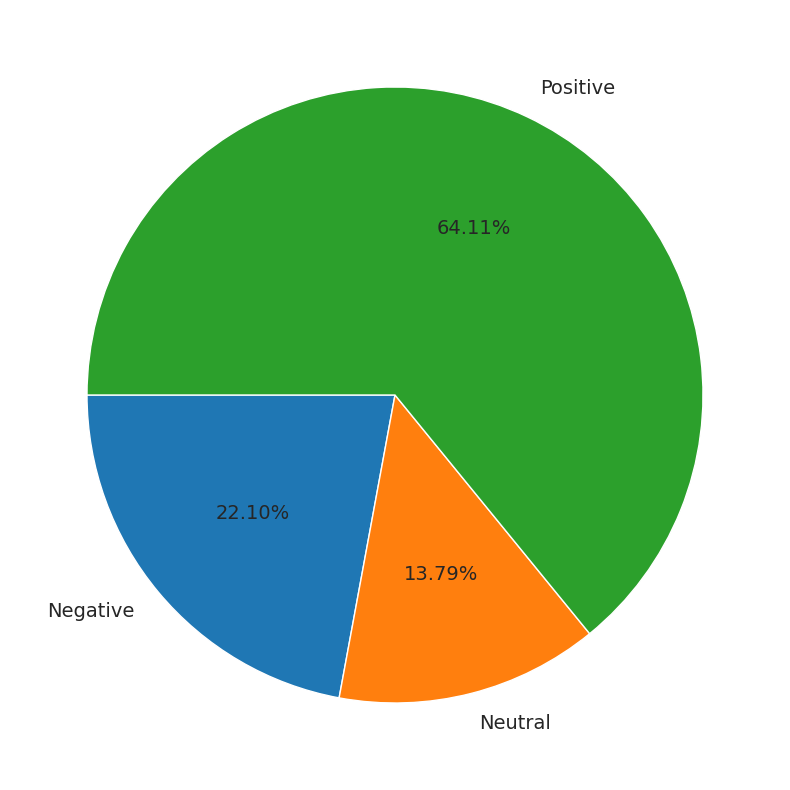

In [ ]:
# Chart - 10 visualization code
df2 = pd.read_csv(filepath2)
sentiment_group = df2.groupby('Sentiment')
s = sentiment_group['Sentiment'].count()
plt.figure(figsize=(10,10))
plt.pie(s, labels = s.index,  startangle = 180,autopct='%1.2f%%')
plt.show()

##### 1. Why did you pick the specific chart?

pie charts are better to demonstrate the proportions of the values.

##### 2. What is/are the insight(s) found from the chart?

we see that there are many apps that are having positive sentiments respect to various apps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We observe that most of the apps that recied translated reviews are positive.




#### Chart - 11
listing top 10 apps based on the recieved translation

In [ ]:
# Chart - 11 visualization code
merge_df =pd.merge(df,df2,how='inner',on='App')
App_Cat_df = merge_df.groupby(['App','Category'])['Translated_Review'].count().reset_index()
App_Cat_df = pd.DataFrame(App_Cat_df)
App_Cat_df = App_Cat_df.sort_values(by=['Translated_Review'], ascending=False)
App_Cat_df.head(10)

,App,Category,Translated_Review
268,Bowmasters,GAME,312
966,Helix Jump,GAME,273
119,Angry Birds Classic,GAME,273
342,Calorie Counter - MyFitnessPal,HEALTH AND FITNESS,254
357,Candy Crush Saga,GAME,240
582,Duolingo: Learn Languages Free,EDUCATION,240
835,Garena Free Fire,GAME,222
21,8 Ball Pool,GAME,219
341,Calorie Counter - Macros,HEALTH AND FITNESS,200
0,10 Best Foods for You,HEALTH AND FITNESS,194


##### 1. Why did you pick the specific chart?

Here we are viewing the apps that recieved max translated reviews.

##### 2. What is/are the insight(s) found from the chart?

we see that mostly the translated reviews are recieved by the Game category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Game category has most number of translated reviews.

#### Chart - 12

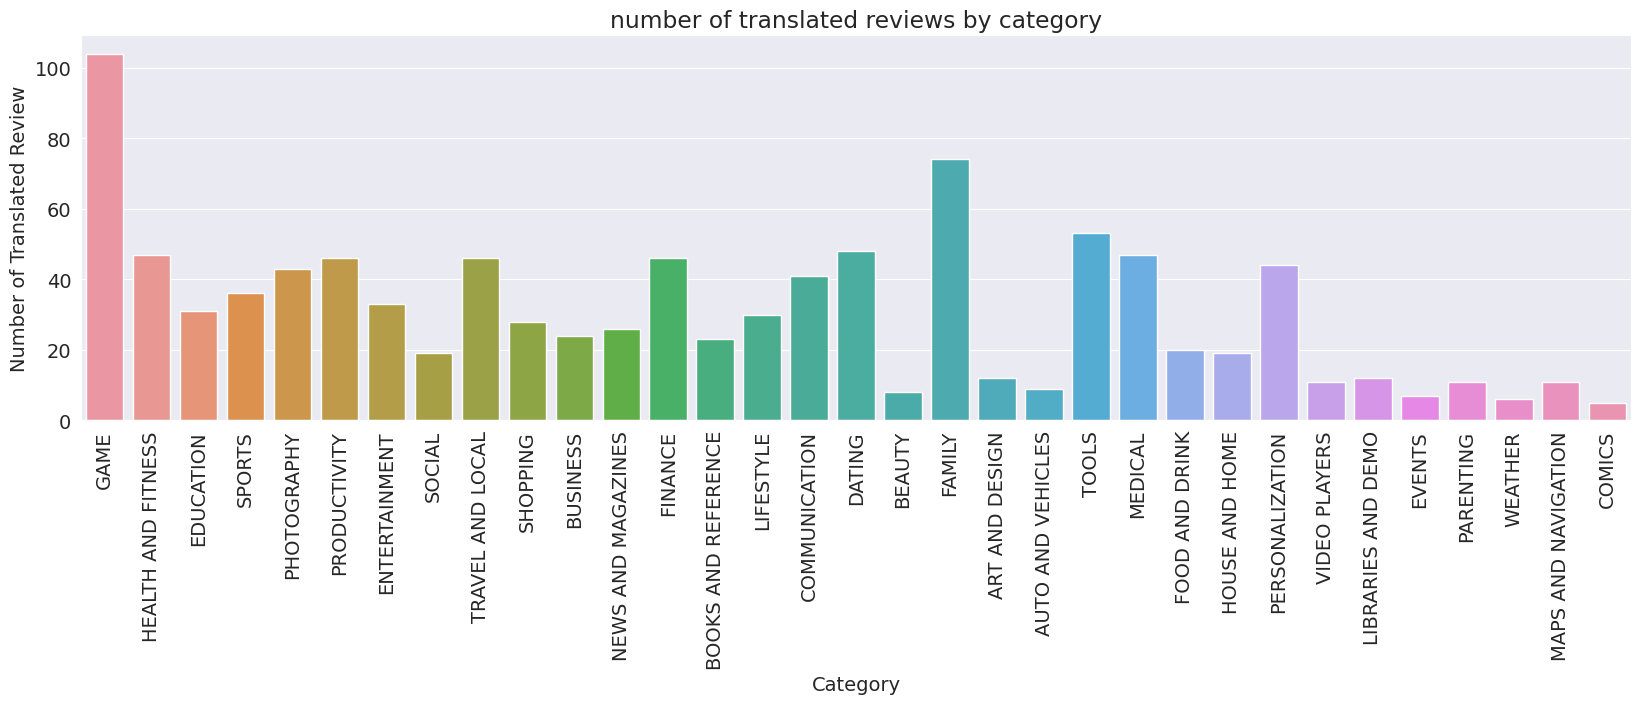

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(20, 5))

#plotting
sns.countplot(data = App_Cat_df, x = App_Cat_df['Category'])

# Setting attributes to infer the plot
plt.title('number of translated reviews by category')
plt.ylabel('Number of Translated Review')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

A count plot shows better repersentation of the counts with respect to their categories.

##### 2. What is/are the insight(s) found from the chart?

We found that the games have recied highest number of counts recieved followed by Family, however the comics weather and events apps have recieved less reviews in the category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Family and games category have recieved more number of translated reviews.

#### Chart - 13
Sentiment Visualization for GAME, FAMILY, COMMUNICATION, LIBRARIES AND DEMO

In [ ]:
df.Category.unique()

array(['ART AND DESIGN', 'AUTO AND VEHICLES', 'BEAUTY',
       'BOOKS AND REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD AND DRINK', 'HEALTH AND FITNESS', 'HOUSE AND HOME',
       'LIBRARIES AND DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL AND LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO PLAYERS', 'NEWS AND MAGAZINES', 'MAPS AND NAVIGATION'],
      dtype=object)

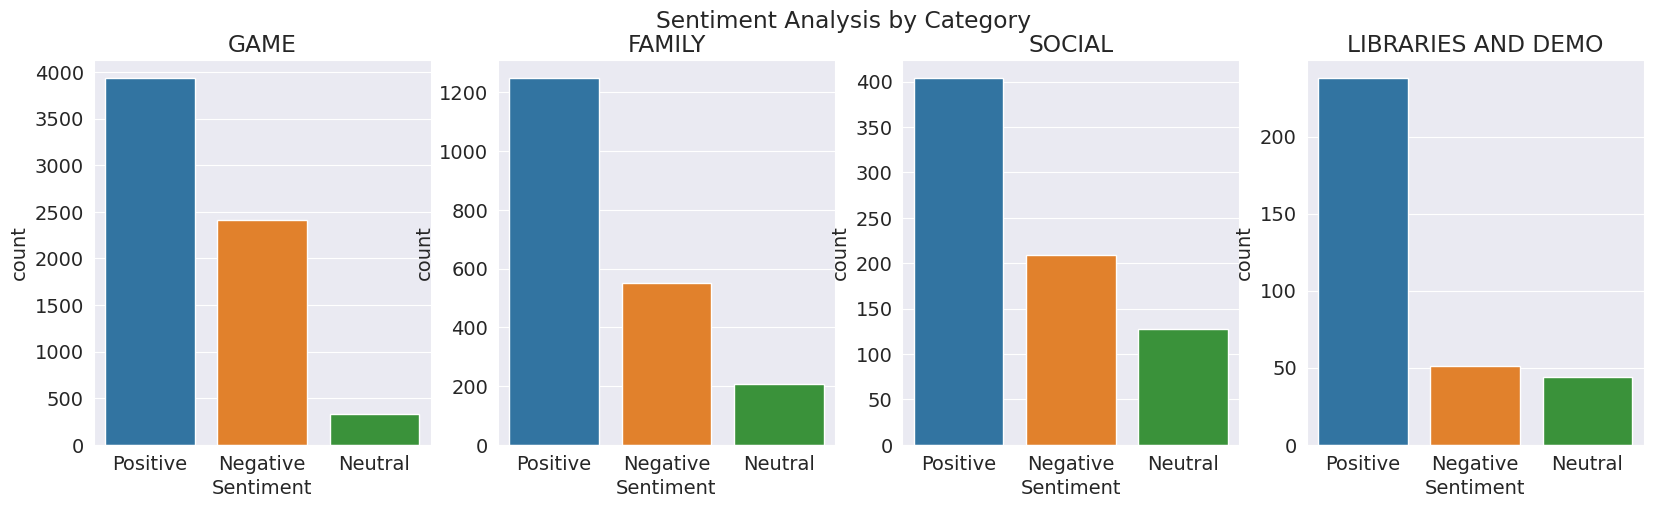

In [ ]:
# Chart - 13 visualization code
x=['GAME','FAMILY','SOCIAL', 'LIBRARIES AND DEMO']
#we can choose any category and include in the x variable

fig, axes = plt.subplots(1, len(x), figsize=(20, 5))

for i, category in enumerate(x):
    temp_df = merge_df[merge_df['Category'] == category]
    sns.countplot(data=temp_df, x='Sentiment', ax=axes[i])
    axes[i].set_title(category)

fig.suptitle('Sentiment Analysis by Category')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Count plots are best suited to plot the counts of various rows and plot. This helps in Visually intrepreting the various counts.

##### 2. What is/are the insight(s) found from the chart?

GAME, FAMILY, SOCIAL, LIBRARIES AND DEMO we see that mostly the apps have positive sentiments towards the given categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

the above charts show that most of the apps in category GAME, FAMILY, SOCIAL, LIBRARIES AND DEMO are having a positive sentiment

We can infer that social app category has approximatly 50% of negative sentiments

#### Chart - 14 - Correlation Heatmap

Text(0.5, 20.722222222222214, 'Feature/Property')

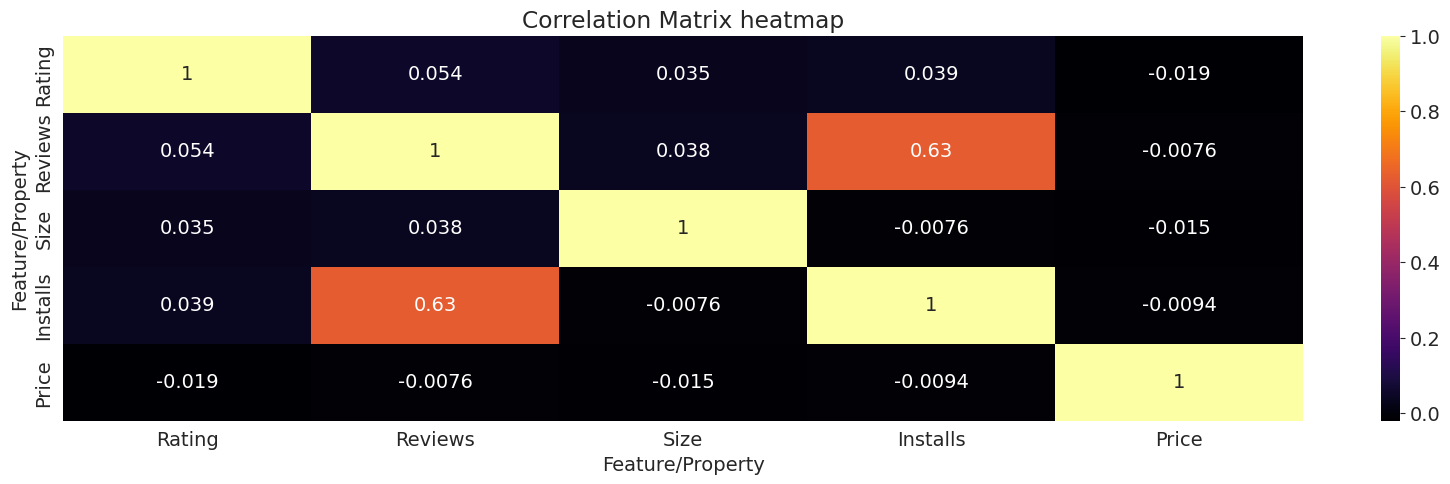

In [ ]:
# Correlation Heatmap visualization code
# Chart - 4 visualization code
corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

#setting labels to infer the plot
plt.title('Correlation Matrix heatmap')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

##### 1. Why did you pick this specific chart?

the best way to plot a correlation matrix is by having a heatmap useing the seaborn Library.
> The values in the matrix range from -1 to 1, and represent the strength and direction of the correlation between two variables. A correlation coefficient of -1 indicates a perfect negative correlation, a coefficient of 0 indicates no correlation, and a coefficient of 1 indicates a perfect positive correlation.

##### 2. What is/are the insight(s) found from the chart?

We see that the correlation between Installs and Price is 0.63 which is good, It means that when there are more reviews on any app the more people tend to install the app. so its a better idea to get reviews on the app.

This gained insights are very helpfull to grow a business as we can add the feature to get reviews on the app and this shall help the app to grow.

#### Chart - 15 - Pair Plot

Text(0.5, 0, 'Feature/Property')

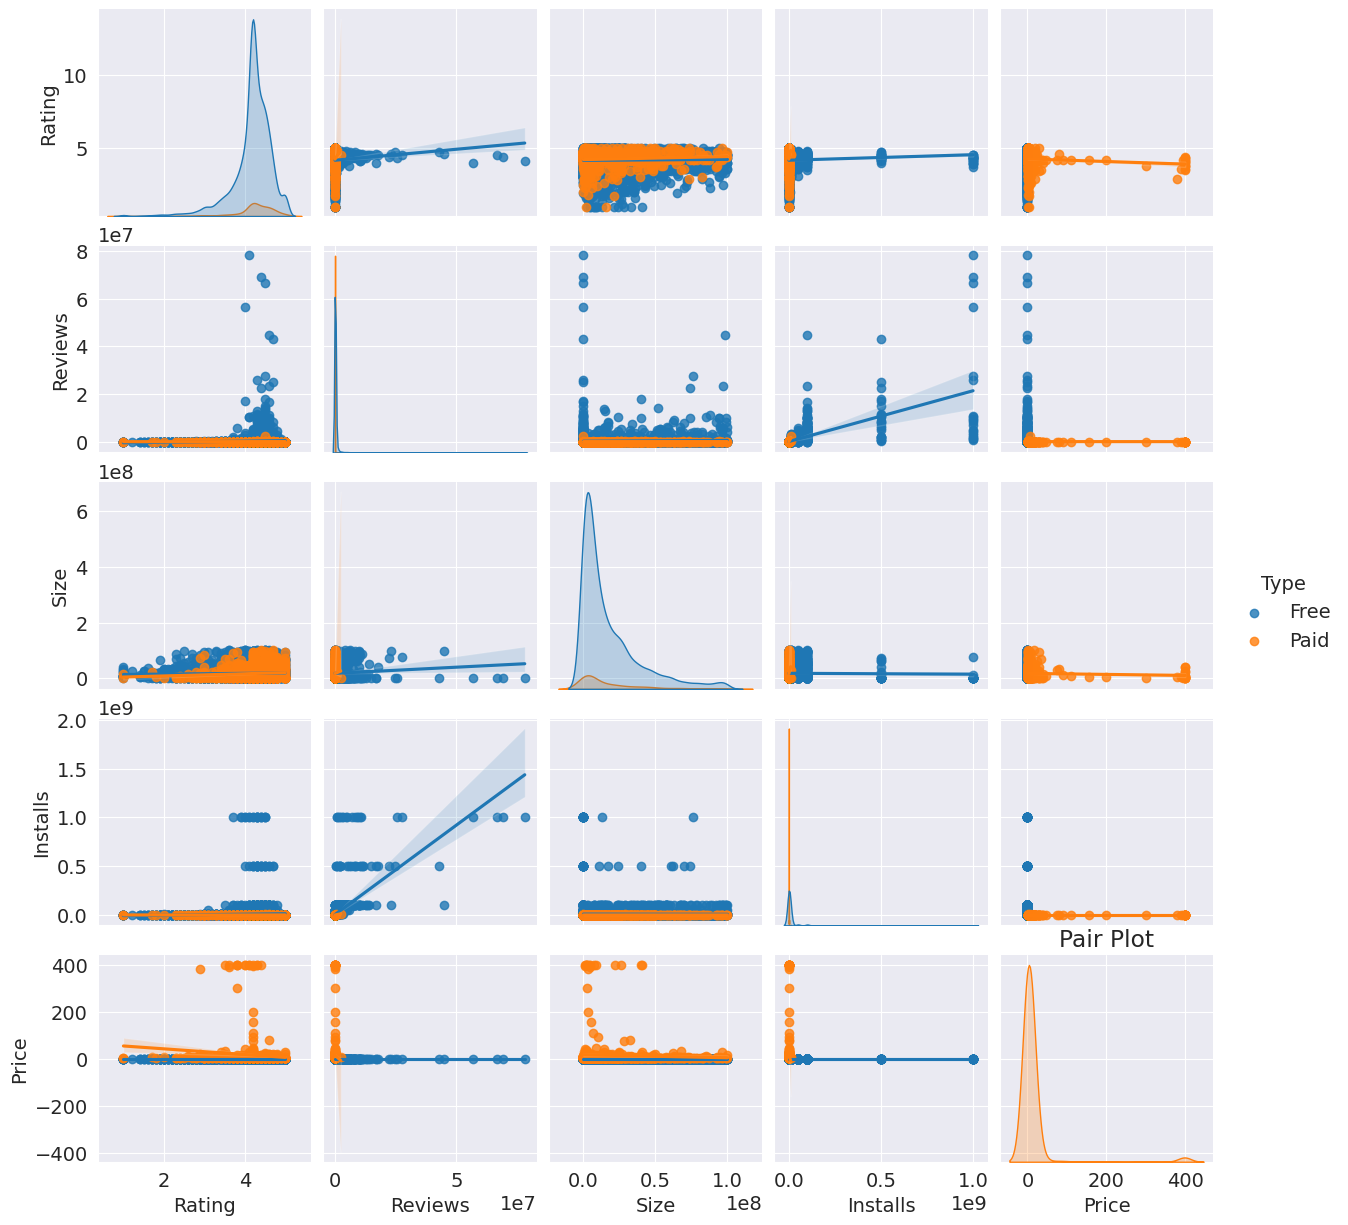

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, diag_kind="kde", kind = 'reg', hue = 'Type')

#setting labels to infer the plot
plt.title('Pair Plot')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

##### 1. Why did you pick the specific chart?

Pair plots are used to show relationship between various variables

Pair plots can also help us explore the distribution of variables in your dataset.

##### 2. What is/are the insight(s) found from the chart?

we find that there is a relation between the reviews and installs, the max installs the max reviews we get, the regression lines is liner and increases as (x=y approximatly)

The installs doesn't grow as the price increases.

size and installs does not have relation.

the diagonal graphs show the kde plotted wrt the own feature, it is noted that the diagonal plots doesnot follow the scale.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

The Google Play Store Apps report provides some useful details regarding the trending of the apps in the play store. As per the graphs visualizations shown above, most of the trending apps (in terms of users' installs) are from the categories like GAME, COMMUNICATION, and TOOL even though the amount of available apps from these categories are twice as much lesser than the category FAMILY but still used most. The trending of these apps are most probably due to their nature of being able to entertain or assist the user. Besides, it also shows a good trend where we can see that developers from these categories are focusing on the quality instead of the quantity of the apps.

Other than that, the charts shown above actually implies that most of the apps having good ratings of above 4.0 are mostly confirmed to have high amount of reviews and user installs. The size and price shouldn't reflect that apps with high rating are mostly big in size and pricy as by looking at the graphs they are most probably are due to some minority. Futhermore, most of the apps that are having high amount of reviews are from the categories of SOCIAL, COMMUNICATION and GAME like Facebook, WhatsApp Messenger, Instagram, Messenger – Text and Video Chat for Free, Clash of Clans ,google apps etc.

Eventhough apps from the categories like GAME, SOCIAL, COMMUNICATION and TOOL of having the highest amount of installs, rating and reviews are reflecting the current trend of Android users, they are not even appearing as category in the top 5 most expensive apps in the store . As a conclsuion, we learnt that the current trend in the Android market are mostly from these categories which either assisting, communicating or entertaining apps.

Some important point:-
Average rating of (active) apps on Google Play Store is 4.17.

If we see individually app wise the communicatation app like facebook and whatsup get highly reviewed app it shown that people regulary active on that and give there feedback also on that.

Medical and Family apps are the most expensive and even extend upto 80$.
Users tend to download a given app more if it has been reviewed by a large number of people.

More than half users rate Family, Sports and Health & Fitness apps positively. Apps for games and social media get mixed reviews, with 50 percent positive and 50 percent negative responses.

# **Conclusion**

In this project of analyzing play store applications, I have worked on several parameters which would help our client to do well in launching their apps on the play store.

1. 92.2% of apps are of free type and 7.8% are paid
2. The minimum rating recieved in Education is 3.5, followed by Art and Design is 3.4, while the lowest ratings are recieved by Dating, Finance. Game, Tools, Communication, Business, productivity, Medical and family are 1. while the average ratings recieved by these categories are fairly good and above 4.1.
3. Ratio of paid and free apps in various categories we see that personalization and medical categories have mor paid apps percentage compare to other categories
4. the count of family apps is more compare to the other categories approximalty 1800 apps belong to the Family category where as Game category has around 950 apps
5. It is observed that the games have more installs followed by communication and tools
6. we found that 81.81% of apps can be rated by Everyone while 10.74% of apps are rated by teens, further the ratings and app usage is narrowed by everyone 10+ and mature 17+ with 4.07 and 3.33% respectively.
7. it is found that the max paid apps charge 0.99 dollars followed by 2.99 dollars and 1.99 dollars, this gives us a clue of having an affordable price of app is equally important.
8. Education, Beauty, Entertainment, parenting, weather and Maps and Navigation category have ratings distributed uniformly since there are less wiskers outside the box.
9. Ther ratings are normally distributed from 1 to 5 where the mean is 4.2 and median is 4.3, there was one outlier which was handled in data wrangling step.
10. With user df we found that 64.11% of recieved translated reviews are positive where as 22.10% of apps have negative sentiments and 13.79% of apps have neutral sentiments towards the apps whcih recied the reviews.
11. the Game categoy has most number of translated reviews followed by Family(plotted in chart 12 above)
12. when checking with sentiments accross various app categories we found that social apps have approximatly 50% of negative sentiments
13. We see that the correlation between Installs and Price is 0.63 which is good, It means that when there are more reviews on any app the more people tend to install the app. so its a better idea to get reviews on the app.
14. we found that there is a relation between the reviews and installs, the max installs the max reviews we get, the regression lines is liner and increases as (x=y approximatly)
15. The installs doesn't grow as the price increases.
16. Size and installs does not have relation.
17. the diagonal graphs in pair show the kde plotted wrt the own feature, it is noted that the diagonal plots doesnot follow the scale.
18. We categorised apps with various size into 4 category, That is Lite size, Medium Size, Large size, and extra large size and found that most of the people prefer to have lite size apps i.e 75% approx where as the other apps are marginally spread.(may depend on the use case and their increased functionality) extra large apps are of share 6% while medium and large apps share 9.5% of the total market.(as of 2018 data)
19. We see that most of the gaming apps are of all the size category and comunication apps are preferred to be made of lite size.
20. looking at trends we see most of the apps are tried to be made lite as it would lead to be a better option.
21. We extracted year of last update and found that most of the apps are recently updated and some of them have been not updated since a long time. For more detail analysis we can selectily visit the apps with old year of updates and check if the apps are stoped due to losses or closed.
22. We generated list of top apps with respect to Reviews, size, Installs, Price, top free. (listed in chart 19 section)
23. we found that some apps are duplicated with same names but different spelling, It is recommended to filter/get more accurate data. where as updating data with code would not be that easy to filter as there are spelling differences in the app names.(example I am Rich app)

***Hurrah! You have successfully completed your EDA Project !!!***